# Pneumonia Diagnosis using Lungs' XRays 

In [40]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
print(os.listdir(r"D:\AMME4111\#Code\SegmentedCNN"))

['test', 'train']


In [41]:
print(os.listdir(r"D:\AMME4111\#Code\SegmentedCNN\train"))

['mild', 'moderate', 'severe']


In [42]:
TRAIN_DIR = r"D:\AMME4111\#Code\SegmentedCNN\train"
TEST_DIR =  r"D:\AMME4111\#Code\SegmentedCNN\test"

**Preprocessing for getting labels**

In [43]:
def assign_num_label(str_label):
    if nextdir in ['mild']:
        label = 0
    elif nextdir in ['moderate']:
        label = 1
    elif nextdir in ['severe']:
        label = 2
    return label

for nextdir in os.listdir(TRAIN_DIR):
    print(nextdir)

mild
moderate
severe


In [44]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        label_word = nextdir
        label_numerical = assign_num_label(label_word)
        temp = Dir + str('\\')+ nextdir 
        #print(temp)
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '\\' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                img = skimage.transform.resize(img, (512, 512, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label_numerical)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

**Have a look on the shape of data**

In [45]:
#-------------------------------------------------------------
# Visualized data

In [49]:
X_train, y_train = preprocessing_data(TRAIN_DIR)

100%|██████████| 16/16 [00:01<00:00, 10.13it/s]


In [50]:
X_test , y_test = preprocessing_data(TEST_DIR)

100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


In [51]:
print(X_train.shape,'\n',X_test.shape)

(100, 512, 512, 3) 
 (39, 512, 512, 3)


In [52]:
print(y_train.shape,'\n',y_test.shape)

(100,) 
 (39,)


In [53]:
from keras.utils.np_utils import to_categorical

# num_classes=3, one-hot code
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

**The arrays are not normalized because they have already been provided in the necessary format.**

In [54]:
print(y_train.shape,'\n',y_test.shape)

(100, 3) 
 (39, 3)


In [55]:
mild_images = os.listdir(TRAIN_DIR + '\\'+"mild")
moderate_images = os.listdir(TRAIN_DIR + '\\'+ "moderate")
severe_images = os.listdir(TRAIN_DIR + '\\'+ "severe")
print(severe_images)

['004.png', '010.png', '013.png', '019.png', '020.png', '023.png', '026.png', '032.png', '035.png', '042.png', '047.png', '058.png', '070.png', '073.png', '079.png', '080.png']


In [56]:
import matplotlib.pyplot as plt
'''
def plotter(i):
    imag1 = cv2.imread(TRAIN_DIR+ '\\'+"mild\\"+mild_images[i])
    imag1 = skimage.transform.resize(imag1, (512, 512, 3) , mode = 'reflect')
    imag2 = cv2.imread(TRAIN_DIR+'\\'+"moderate\\"+moderate_images[i])
    imag2 = skimage.transform.resize(imag2, (512, 512, 3))
    imag3 = cv2.imread(TRAIN_DIR+'\\'+"severe\\"+severe_images[i])
    imag3 = skimage.transform.resize(imag3, (512, 512, 3))
    pair = np.concatenate((imag1, imag2,imag3), axis=1)
    print("(Left) - Mild   (Middle) - Moderate   (Right) - Severe")
    print("------------------------------------------------------")
    plt.figure(figsize=(12,7))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)
'''

'\ndef plotter(i):\n    imag1 = cv2.imread(TRAIN_DIR+ \'\\\'+"mild\\"+mild_images[i])\n    imag1 = skimage.transform.resize(imag1, (512, 512, 3) , mode = \'reflect\')\n    imag2 = cv2.imread(TRAIN_DIR+\'\\\'+"moderate\\"+moderate_images[i])\n    imag2 = skimage.transform.resize(imag2, (512, 512, 3))\n    imag3 = cv2.imread(TRAIN_DIR+\'\\\'+"severe\\"+severe_images[i])\n    imag3 = skimage.transform.resize(imag3, (512, 512, 3))\n    pair = np.concatenate((imag1, imag2,imag3), axis=1)\n    print("(Left) - Mild   (Middle) - Moderate   (Right) - Severe")\n    print("------------------------------------------------------")\n    plt.figure(figsize=(12,7))\n    plt.imshow(pair)\n    plt.show()\nfor i in range(0,5):\n    plotter(i)\n'

In [57]:
'''
import matplotlib.pyplot as plt

plt.bar(['mild','moderate','severe'],[len(mild_images),len(moderate_images),len(severe_images)])
plt.title('training data')
plt.show()

mild_test = os.listdir(TEST_DIR + '\\'+"mild")
moderate_test = os.listdir(TEST_DIR + '\\'+ "moderate")
severe_test = os.listdir(TEST_DIR + '\\'+ "severe")

plt.bar(['mild','moderate','severe'],[len(mild_test),len(moderate_test),len(severe_test)])
plt.title('testing data')
plt.show()
'''

'\nimport matplotlib.pyplot as plt\n\nplt.bar([\'mild\',\'moderate\',\'severe\'],[len(mild_images),len(moderate_images),len(severe_images)])\nplt.title(\'training data\')\nplt.show()\n\nmild_test = os.listdir(TEST_DIR + \'\\\'+"mild")\nmoderate_test = os.listdir(TEST_DIR + \'\\\'+ "moderate")\nsevere_test = os.listdir(TEST_DIR + \'\\\'+ "severe")\n\nplt.bar([\'mild\',\'moderate\',\'severe\'],[len(mild_test),len(moderate_test),len(severe_test)])\nplt.title(\'testing data\')\nplt.show()\n'

**The classes are imbalanced therefore validation accuracy won't be a good metric to analyze the model performance , We will also have to take precision , recall and confusion matrix into account.**

In [58]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1) # min_delta = epsilon

**Callbacks to reduce learning rate timely after monitoring a quantity.**

In [59]:
filepath="weights.hdf5" # define the file where we gonna save weights
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

**Making checkpoints timely to check and save the best model performance till last and also avoiding further validation accuracy drop due to overfitting.**

In [60]:
# Import the layers used for model
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [61]:
a = X_train.shape[0]
b = y_test.shape[0]
print(a,b)
X_train=X_train.reshape(a,3,512,512 )
X_test=X_test.reshape(b,3,512,512)

100 39


### Tried different model architectures , the best I could achieve was 83.75 % validation accuracy without any pre-trained CNN models. The architecture is different from the best and could give 83.01 %  . But again our main criteria is not accuracy but the precision and recall.

### Other Hyperparameters like learning rates, epochs, batch size , no. of filters , activation function have been tuned repeatedly to achieve better results.

In [62]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(3,512,512)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

# learning rate lr in RMSprop could change, do not change other parameters in optimizer
model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 512, 512)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 256, 256)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1048576)           0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                33554464  
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 33,555,011
Trainable params: 33,555,011
Non-trainable params: 0
________________________________________________________________

In [63]:
batch_size = 20
epochs = 10

In [64]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

Train on 100 samples, validate on 39 samples
Epoch 1/10
100/100 [==============================] - ETA: 2s - loss: 0.9790 - acc: 0.781 - ETA: 0s - loss: 0.4895 - acc: 0.890 - ETA: 0s - loss: 0.3263 - acc: 0.927 - 2s 17ms/step - loss: 0.3133 - acc: 0.9300 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00001: val_acc improved from -inf to 1.00000, saving model to weights.hdf5
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.000 - ETA: 0s - loss: 1.6764e-07 - acc: 1.000 - ETA: 0s - loss: 1.0375e-06 - acc: 1.000 - 1s 7ms/step - loss: 1.0008e-06 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00002: val_acc did not improve from 1.00000
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 1.2480e-07 - acc: 1.000 - ETA: 0s - loss: 1.2200e-07 - acc: 1.000 - ETA: 0s - loss: 1.2107e-07 - acc: 1.000 - 1s 7ms/step - loss: 1.2100e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

Epoch 00003: ReduceLROnPlateau reducin

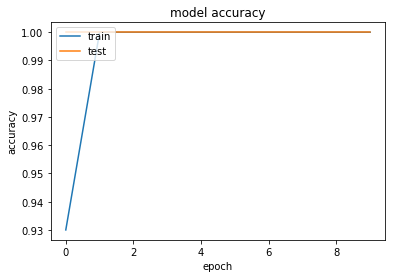

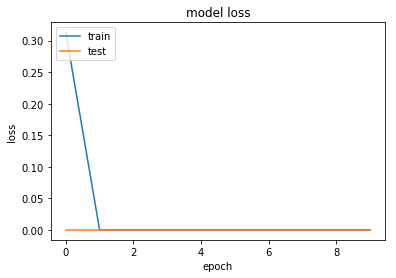

In [74]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**The model will try to overfit itself but rather save it prior going to the next epoch using necessary callbacks.**

**For better performance, we will use exponential decaying learning rate and specify steps_per_epoch**

In [104]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
#print(pred)
y_true = np.argmax(y_test,axis = 1)
print(y_true)
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
